In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Load the dataset
df = pd.read_csv('train.csv')

# Display the first few rows of the dataset
print("🔍 Dataset Overview:")
display(df.head())

# Basic information about the dataset
print("\n🔍 Dataset Information:")
df.info()

# Checking for missing values
print("\n🔍 Missing Values Summary:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Descriptive statistics for numerical and categorical columns
print("\n🔍 Summary Statistics:")
print("Numerical Features:")
display(df.describe())
print("\nCategorical Features:")



c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


🔍 Dataset Overview:


,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,104.0,12.5,0.25,0.25,0.25,0.75,69.7,42.1,58.2,50.2,24.3,41.2,16.00,0.26,0.477941,0.423927,34.043022,6079.08526
1,1,764.0,25.0,0.00,0.00,0.00,0.00,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.334594,0.354415,27.735098,2946.92602
2,2,621.0,25.0,0.50,0.25,0.75,0.63,86.0,52.0,71.9,62.0,30.0,50.8,34.00,0.56,0.468192,0.417915,34.838815,5323.30034
3,3,499.0,25.0,0.50,0.25,0.38,0.75,69.7,42.1,58.2,50.2,24.3,41.2,24.00,0.39,0.500558,0.427431,35.134955,6157.05484
4,4,439.0,12.5,0.25,0.38,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,24.00,0.39,0.520181,0.464067,37.029180,6992.82314



🔍 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15000 non-null  int64  
 1   Row#                  15000 non-null  float64
 2   clonesize             15000 non-null  float64
 3   honeybee              15000 non-null  float64
 4   bumbles               15000 non-null  float64
 5   andrena               15000 non-null  float64
 6   osmia                 15000 non-null  float64
 7   MaxOfUpperTRange      15000 non-null  float64
 8   MinOfUpperTRange      15000 non-null  float64
 9   AverageOfUpperTRange  15000 non-null  float64
 10  MaxOfLowerTRange      15000 non-null  float64
 11  MinOfLowerTRange      15000 non-null  float64
 12  AverageOfLowerTRange  15000 non-null  float64
 13  RainingDays           15000 non-null  float64
 14  AverageRainingDays    15000 non-null  float64


,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,427.577533,19.773500,0.388500,0.284573,0.486751,0.591612,82.245667,49.719033,68.717353,59.282947,28.686927,48.611360,18.804700,0.327261,0.501015,0.445967,36.115335,6022.687345
std,4330.271354,214.127422,6.644451,0.390162,0.058855,0.147560,0.144194,9.104125,5.519865,7.606632,6.579928,3.180584,5.371006,11.880294,0.166934,0.077379,0.038092,4.121393,1362.796312
min,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,56.800000,50.200000,24.300000,30.000000,1.000000,0.060000,0.029066,0.217545,22.079199,1637.704020
25%,3749.750000,247.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.451083,0.418220,33.239806,5124.854900
50%,7499.500000,469.000000,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.506225,0.446518,36.040675,6107.382470
75%,11249.250000,598.000000,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.564795,0.472271,39.099614,7028.673500
max,14999.000000,777.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,62.000000,34.000000,0.560000,0.960586,0.645475,46.369344,8969.401840



Categorical Features:


# Distributions of Numerical Features

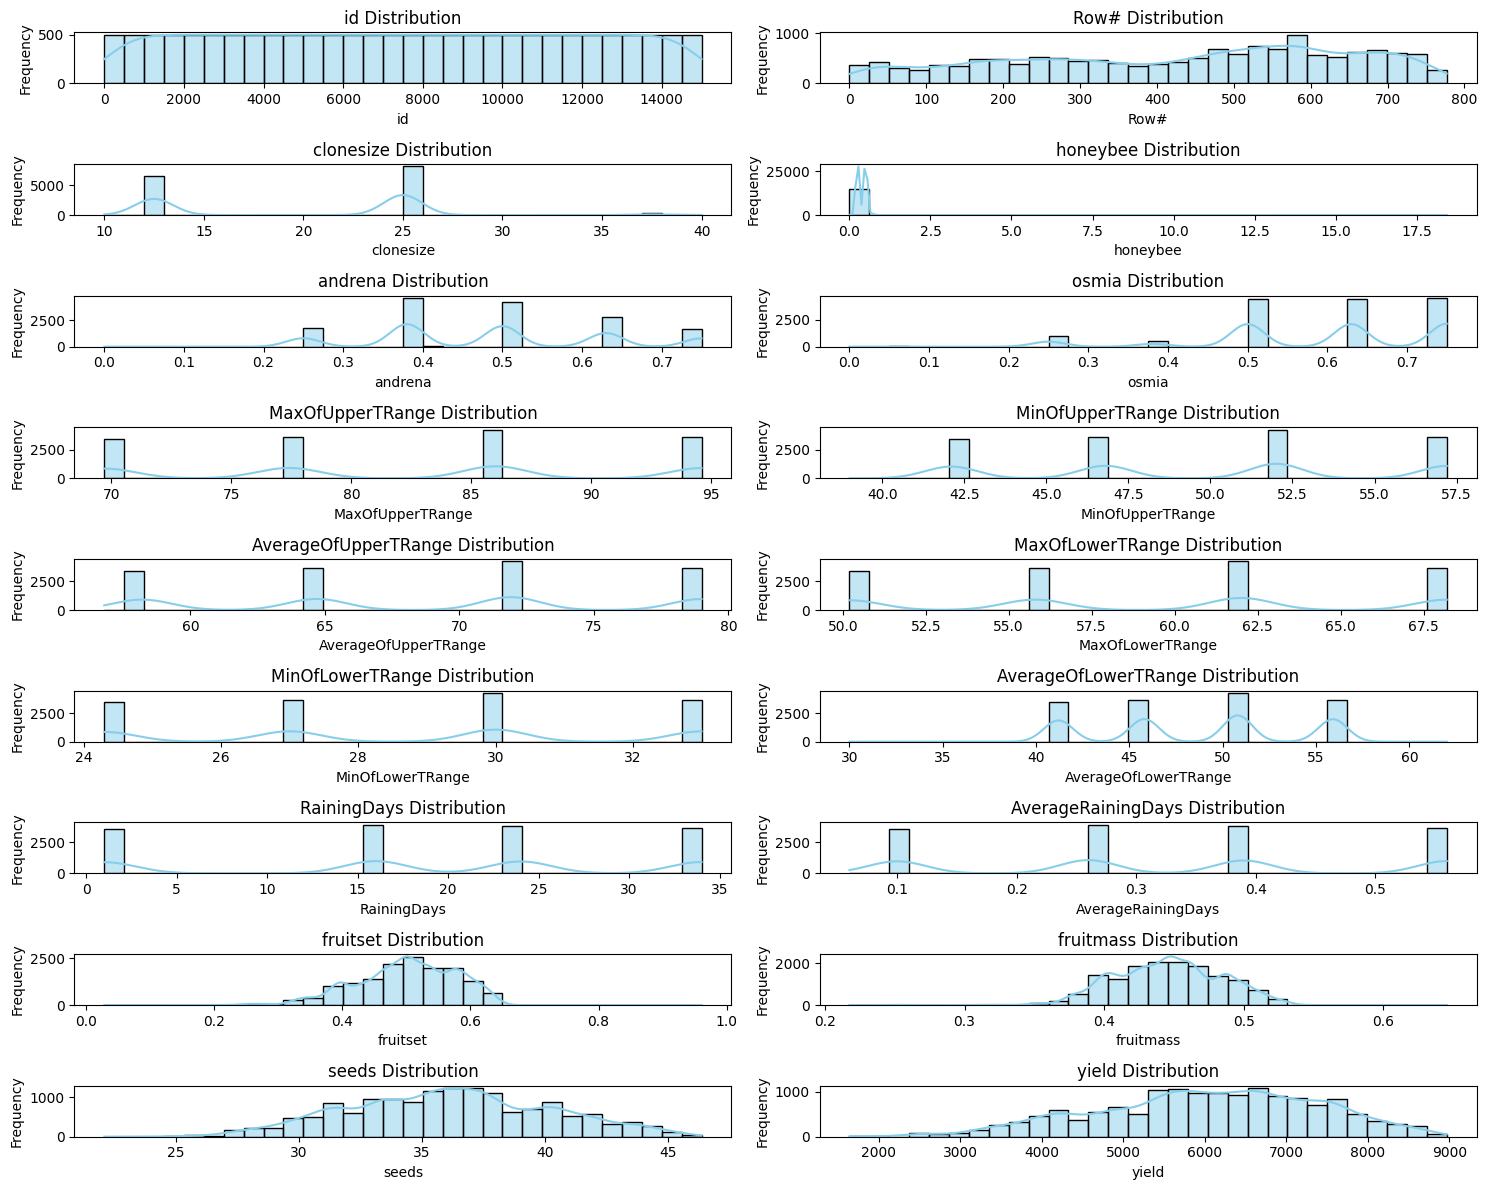

In [21]:
# Distribution plots for numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_features, 1):
    plt.subplot((len(numerical_features) + 1) // 2, 2, i)
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [16]:
df['bumbles'].value_counts()

bumbles
0.250    10902
0.380     4047
0.117       35
0.000        9
0.058        2
0.042        2
0.293        1
0.585        1
0.065        1
Name: count, dtype: int64

In [19]:
# Discretization into bins
bins = [0, 35, 4047, 10902]
labels = ['Low', 'Middle', 'Hight']
df['bumbles'] = pd.cut(df['bumbles'], bins=bins, labels=labels)

In [20]:
# Perform one-hot encoding
df = pd.get_dummies(df, columns=['bumbles'])

print(df)

          id   Row#  clonesize  honeybee  andrena  osmia  MaxOfUpperTRange  \
0          0  104.0       12.5      0.25     0.25   0.75              69.7   
1          1  764.0       25.0      0.00     0.00   0.00              86.0   
2          2  621.0       25.0      0.50     0.75   0.63              86.0   
3          3  499.0       25.0      0.50     0.38   0.75              69.7   
4          4  439.0       12.5      0.25     0.50   0.75              77.4   
...      ...    ...        ...       ...      ...    ...               ...   
14995  14995  661.0       25.0      0.50     0.38   0.50              77.4   
14996  14996  131.0       12.5      0.25     0.25   0.50              94.6   
14997  14997  444.0       12.5      0.25     0.50   0.50              77.4   
14998  14998  461.0       12.5      0.25     0.38   0.75              69.7   
14999  14999  159.0       12.5      0.25     0.38   0.63              77.4   

       MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange

# Correlation Analysis

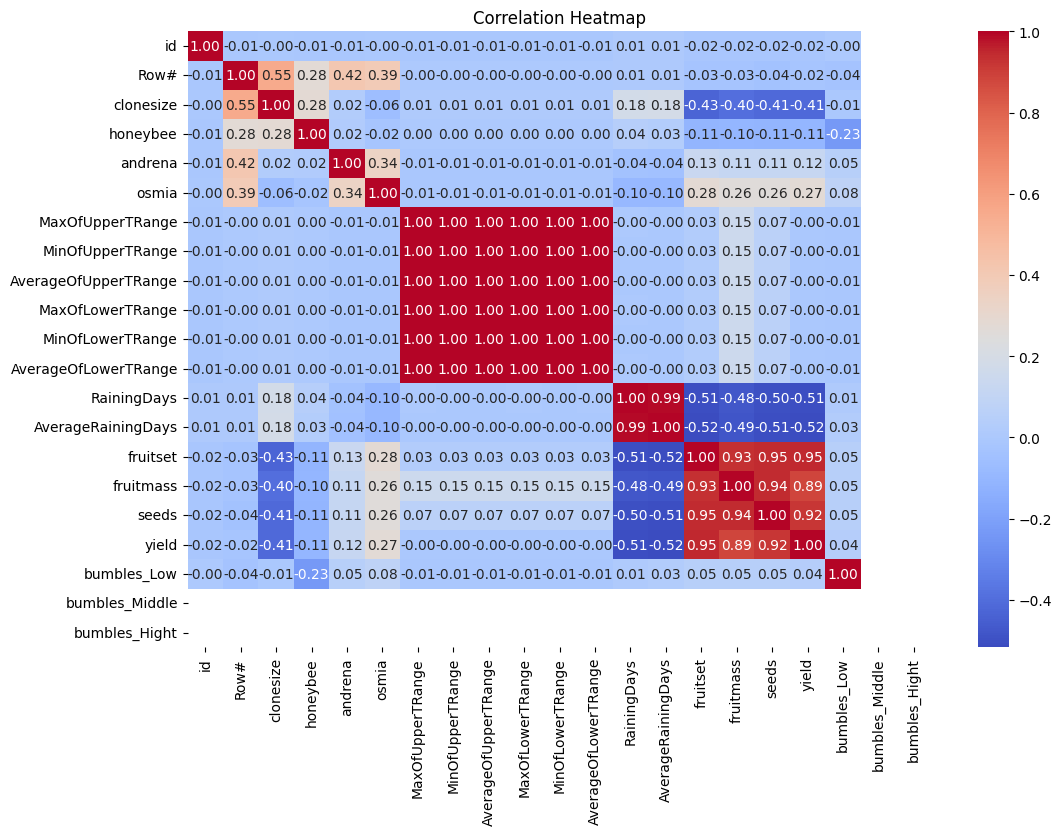

In [22]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Categorical Features Analysis


In [13]:
# Count plots for categorical features
categorical_features = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features):
    plt.subplot(len(categorical_features) // 2 + 1, 2, i + 1)
    sns.countplot(data=df, x=col)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


<Figure size 1500x1000 with 0 Axes>